In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [8]:
car_details = pd.read_csv("D:/Learning_ML/car_details.csv")

x = car_details.select_dtypes(include=['number']).drop(columns=['selling_price']).values
y = car_details['selling_price'].values

In [ ]:
car_details.head()

<Axes: >

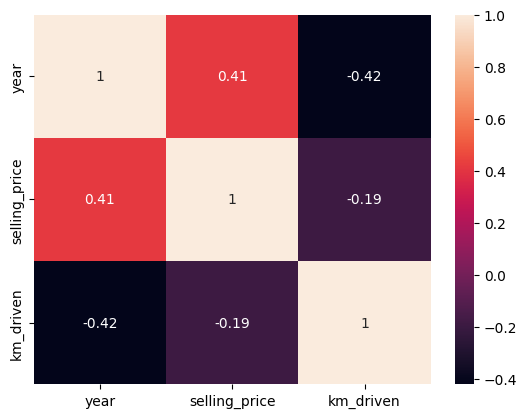

In [14]:
numeric_df = car_details.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [18]:
y_pred = regression.predict(x_test)

from sklearn.metrics import r2_score, mean_squared_error

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.1620831376822649
MSE: 255707328588.57532


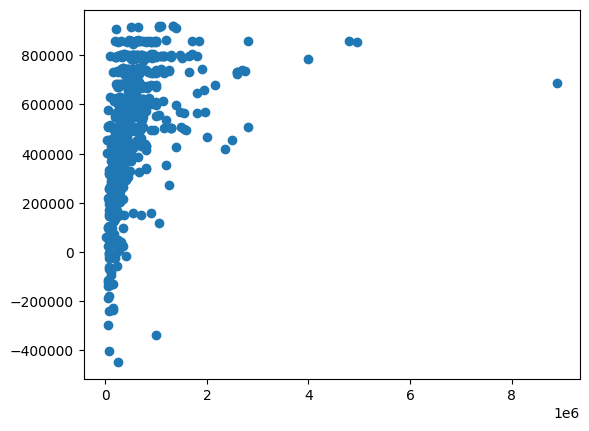

In [19]:
plt.scatter(y_test, y_pred)